# I) Modèle SIR

In [7]:
import numpy as np

beta=0.58
gamma=1/10

def SIR(i0,N,nbjours):


    # Creation of lists
    S=np.zeros(nbjours)
    I=np.zeros(nbjours)
    R=np.zeros(nbjours)

    # Initial Condition
    I[0]=i0
    S[0]=N-i0

    #Propagation
    for i in range(nbjours-1):
        S[i+1]=S[i]-beta*I[i]*S[i]/N
        I[i+1]=I[i]+beta*I[i]*S[i]/N - gamma*I[i]
        R[i+1]=R[i]+gamma*I[i]

    return S,I,R

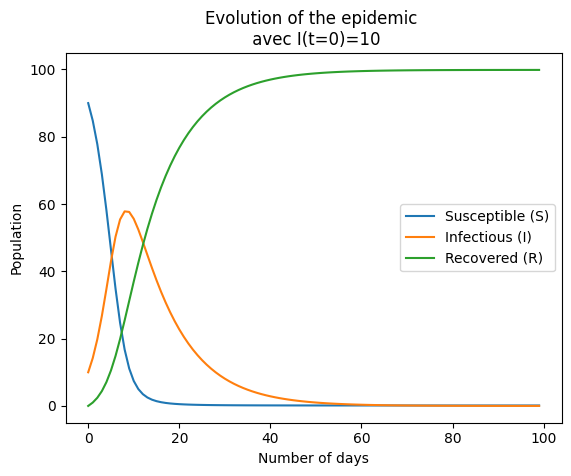

In [8]:
S,I,R=SIR(10,100,100)
plt.plot(S,label="Susceptible (S)")
plt.plot(I,label="Infectious (I)")
plt.plot(R,label="Recovered (R)")
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic \n avec I(t=0)={int(I[0])}")
plt.legend()
plt.show()

# II) Modèle SEIRD

In [9]:


def seird_model(i0, N, nbday, beta, sigma, gamma, mu, e0=0):

    # Creation of lists
    S = np.zeros(nbday)
    E = np.zeros(nbday)
    I = np.zeros(nbday)
    R = np.zeros(nbday)
    D = np.zeros(nbday)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    S[0] = N - i0 - e0 - R[0] - D[0] # Total must sum to N

    # Propagation
    for i in range(nbday - 1):

        S[i+1] = S[i] - beta * I[i] * S[i] / N
        E[i+1] = E[i] + beta * I[i] * S[i] / N - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i] - mu * I[i]
        R[i+1] = R[i] + gamma * I[i]
        D[i+1] = D[i] + mu * I[i]

    return S, E, I, R, D



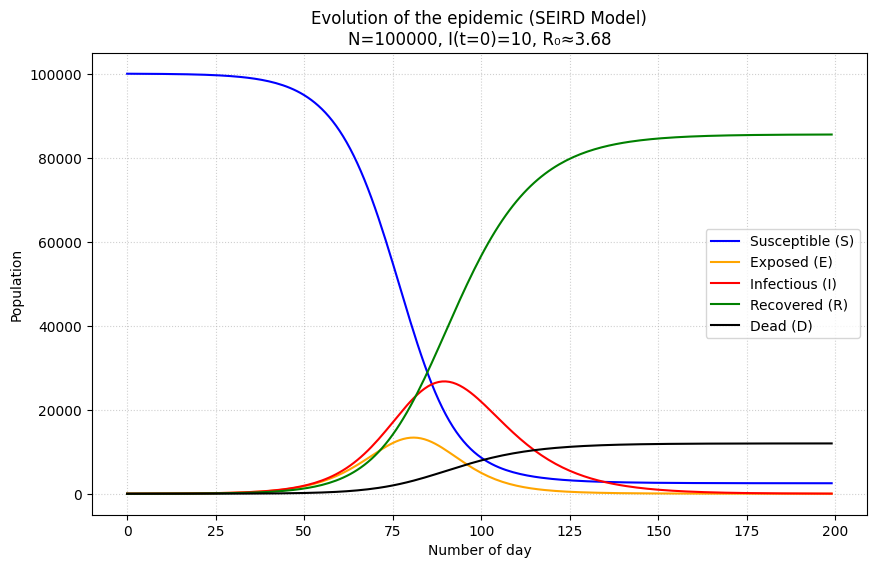

In [6]:
# 1. Define Parameters and Initial Conditions
N_total = 100000 # Total population
i_initial = 10   # Initial infected (I0)
e_initial = 10   # Initial exposed (E0)
days = 200       # Number of days to simulate

# Model Parameters (Random Values)
beta = 0.3      # Transmission rate (R0 = beta / (gamma + mu))
sigma = 1/5     # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/14    # Recovery rate (1/recovery period, e.g., 14 days)
mu = 0.01       # Mortality rate

# 2. Run the SEIRD simulation
S, E, I, R, D = seird_model(i_initial, N_total, days, beta, sigma, gamma, mu, e0=e_initial)

# 3. Plot the results
plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.plot(D, label="Dead (D)", color='black')
plt.xlabel("Number of day")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIRD Model)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()